In [5]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # Changed import to matplotlib.pyplot
df=pd.read_csv("/fraudTrain.csv")

In [6]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [7]:
df.shape

(139857, 23)

In [8]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

## **1) DROPPING THE UNWANTED COLUMNS**

In [9]:
df.drop(columns= ['Unnamed: 0', 'trans_date_trans_time', 'cc_num',
                   'merchant', 'first', 'last','street', 'city', 'zip', 'lat', 'long', 'dob', 'trans_num', 'unix_time','merch_lat', 'merch_long'],
        inplace = True)

In [10]:
df.head()

,category,amt,gender,state,city_pop,job,is_fraud
0,misc_net,4.97,F,NC,3495.0,"Psychologist, counselling",0.0
1,grocery_pos,107.23,F,WA,149.0,Special educational needs teacher,0.0
2,entertainment,220.11,M,ID,4154.0,Nature conservation officer,0.0
3,gas_transport,45.00,M,MT,1939.0,Patent attorney,0.0
4,misc_pos,41.96,M,VA,99.0,Dance movement psychotherapist,0.0


# **2) CHECKING FOR NULL VALUES**


In [11]:
df.isna().sum()

,0
category,1
amt,1
gender,1
state,1
city_pop,1
job,1
is_fraud,1


In [12]:
df.dropna(inplace = True)


In [13]:
df.isna().sum()

,0
category,0
amt,0
gender,0
state,0
city_pop,0
job,0
is_fraud,0


# **3) CATEGORIAL TO NUMERICAL ENCODING BY USE OF ONEHOTENCODING**

In [14]:
df['category'].unique()

array(['misc_net', 'grocery_pos', 'entertainment', 'gas_transport',
       'misc_pos', 'grocery_net', 'shopping_net', 'shopping_pos',
       'food_dining', 'personal_care', 'health_fitness', 'travel',
       'kids_pets', 'home'], dtype=object)

In [15]:
category_df= (pd.get_dummies(df['category'])).astype('int') # pd.get_dummies() used for one-hot encoding categorical variables.

In [16]:
category_df.head()

,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [17]:
df.drop(columns=['category'], inplace=True)

In [18]:
df.head()

,amt,gender,state,city_pop,job,is_fraud
0,4.97,F,NC,3495.0,"Psychologist, counselling",0.0
1,107.23,F,WA,149.0,Special educational needs teacher,0.0
2,220.11,M,ID,4154.0,Nature conservation officer,0.0
3,45.00,M,MT,1939.0,Patent attorney,0.0
4,41.96,M,VA,99.0,Dance movement psychotherapist,0.0


In [19]:
#CONCATENATING THE df and category_df COLUMNS USNIG pd.concat()
df=pd.concat([df,category_df], axis=1) # AXIS = 1 MEANS CONCATENATION IS COLUMN BASED

In [20]:
df.head(3)

,amt,gender,state,city_pop,job,is_fraud,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel
0,4.97,F,NC,3495.0,"Psychologist, counselling",0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,107.23,F,WA,149.0,Special educational needs teacher,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,220.11,M,ID,4154.0,Nature conservation officer,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
df['gender'].unique()

array(['F', 'M'], dtype=object)

In [22]:
df['gender'].replace({'F':1, 'M':0}, inplace=True) #JUST 2 UNIQUE VALUES SO WE MAKE USE OF .replace METHOD

/tmp/ipython-input-22-1932073347.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].replace({'F':1, 'M':0}, inplace=True) #JUST 2 UNIQUE VALUES SO WE MAKE USE OF .replace METHOD
/tmp/ipython-input-22-1932073347.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'].replace({'

In [23]:
df['gender'].unique()

array([1, 0])

In [24]:
state_df= (pd.get_dummies(df['state'])).astype('int') #ONEHOTENCODING USED

In [25]:
state_df.head()

,AK,AL,AR,AZ,CA,CO,CT,DC,FL,GA,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [26]:
df.drop(columns=['state'],inplace=True)

In [27]:
df=pd.concat([df,state_df],axis=1)

In [28]:
df.head(3)

,amt,gender,city_pop,job,is_fraud,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,4.97,1,3495.0,"Psychologist, counselling",0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,107.23,1,149.0,Special educational needs teacher,0.0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,220.11,0,4154.0,Nature conservation officer,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
df['job'].unique().shape

(480,)

In [30]:
job_df= (pd.get_dummies(df['job'])).astype('int')

In [31]:
job_df.head()

,Academic librarian,"Accountant, chartered certified","Accountant, chartered public finance",Accounting technician,Acupuncturist,Administrator,"Administrator, arts","Administrator, charities/voluntary organisations","Administrator, education","Administrator, local government",...,Video editor,Visual merchandiser,Volunteer coordinator,Warden/ranger,Waste management officer,Water engineer,Water quality scientist,Web designer,Wellsite geologist,Writer
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
df.drop(columns=['job'],inplace=True)

In [33]:
df= pd.concat([df, job_df], axis=1)

In [34]:
df.shape

(139856, 548)

In [35]:
df.head(3)

,amt,gender,city_pop,is_fraud,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,...,Video editor,Visual merchandiser,Volunteer coordinator,Warden/ranger,Waste management officer,Water engineer,Water quality scientist,Web designer,Wellsite geologist,Writer
0,4.97,1,3495.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,107.23,1,149.0,0.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,220.11,0,4154.0,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **4) DIVISION OF DATAFRAME**

In [36]:
X = df.drop(columns = ['is_fraud'])
y = df['is_fraud']

In [37]:
X.shape

(139856, 547)

In [38]:
y.value_counts()

,count
is_fraud,
0.0,138546
1.0,1310


<Axes: title={'center': 'IMBALANCE'}, xlabel='is_fraud', ylabel='count'>

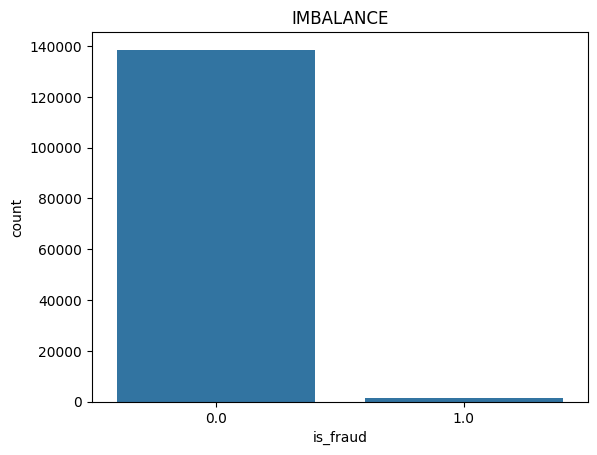

In [39]:
plt.title('IMBALANCE')
sns.countplot(x='is_fraud', data=df) # Added data=df for countplot

There is high degree of imbalance in the is_fraud field. We need to handle this imbalance using SMOTE.

# **5) BALANCING THE DATASET USING SMOTE**

In [40]:
!pip install imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = 'minority')
X, y = smote.fit_resample(X, y)

In [41]:
y.value_counts()

,count
is_fraud,
0.0,138546
1.0,138546


In [42]:
X.shape

(277092, 547)

# **6) DATA NORMALIZATION**

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X[:] = scaler.fit_transform(X)

In [44]:

X.head()

,amt,gender,city_pop,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,...,Video editor,Visual merchandiser,Volunteer coordinator,Warden/ranger,Waste management officer,Water engineer,Water quality scientist,Web designer,Wellsite geologist,Writer
0,0.000310,1,0.001194,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.008308,1,0.000043,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.017135,0,0.001421,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.003441,0,0.000659,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.003203,0,0.000026,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
X.describe()

,amt,gender,city_pop,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,...,Video editor,Visual merchandiser,Volunteer coordinator,Warden/ranger,Waste management officer,Water engineer,Water quality scientist,Web designer,Wellsite geologist,Writer
count,277092.000000,277092.000000,277092.000000,277092.000000,277092.000000,277092.000000,277092.000000,277092.000000,277092.000000,277092.000000,...,277092.000000,277092.000000,277092.000000,277092.000000,277092.000000,277092.000000,277092.000000,277092.000000,277092.000000,277092.000000
mean,0.022628,0.502375,0.034208,0.039698,0.037684,0.065069,0.018900,0.142953,0.034931,0.049940,...,0.003880,0.000339,0.000754,0.001245,0.001097,0.002541,0.000213,0.001032,0.000841,0.000206
std,0.028596,0.499995,0.107940,0.195249,0.190432,0.246647,0.136172,0.350025,0.183604,0.217822,...,0.062165,0.018415,0.027454,0.035264,0.033105,0.050341,0.014590,0.032111,0.028986,0.014341
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.001570,0.000000,0.000228,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.006866,1.000000,0.000861,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.030627,1.000000,0.009288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# **7) TRAIN-TEST SPLIT**

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [47]:
X_train.shape, X_test.shape

((221673, 547), (55419, 547))

In [48]:
y_train.value_counts()

,count
is_fraud,
1.0,110837
0.0,110836


In [49]:
y_test.value_counts()

,count
is_fraud,
0.0,27710
1.0,27709


# **8) BUILDING THE ARTIFICIAL NEURAL NETWORK**

In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    # input layer + hidden layer 1
    keras.layers.Dense(300, input_shape = (X_train.shape[1],), activation = 'relu'),
    # hidden layer 2
    keras.layers.Dense(150, activation = 'relu'),
    #outpur layer
    keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.fit(X_train, y_train, epochs = 10, batch_size = 200)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9432 - loss: 0.1360
Epoch 2/50
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9911 - loss: 0.0282
Epoch 3/50
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9926 - loss: 0.0228
Epoch 4/50
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9937 - loss: 0.0184
Epoch 5/50
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9947 - loss: 0.0157
Epoch 6/50
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9954 - loss: 0.0135
Epoch 7/50
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9954 - loss: 0.0130
Epoch 8/50
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9956 - loss: 0.0126
Epoch 9/50
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9954 - loss: 0.0127
Epoch 10/50
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9957 - loss: 0.0122
Epoch 11/50
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9958 - loss: 0.0116
Epoch 12/50
1109/1109 ━━━━━━━━

# **9) MODEL EVALUATION**

In [51]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Model Accuracy : {accuracy * 100}')

1732/1732 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9962 - loss: 0.0215
Model Accuracy : 99.63009357452393


In [52]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 300)            │       164,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 150)            │        45,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           151 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 629,105 (2.40 MB)

 Trainable params: 209,701 (819.14 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 419,404 (1.60 MB)

In [53]:
pred = model.predict(X_test)

1732/1732 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


# **10) PREDICTION**

In [54]:
binary_pred = (pred > 0.5).astype('int')

In [55]:
binary_pred

array([[0],
       [1],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [56]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, binary_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     27710
         1.0       0.99      1.00      1.00     27709

    accuracy                           1.00     55419
   macro avg       1.00      1.00      1.00     55419
weighted avg       1.00      1.00      1.00     55419



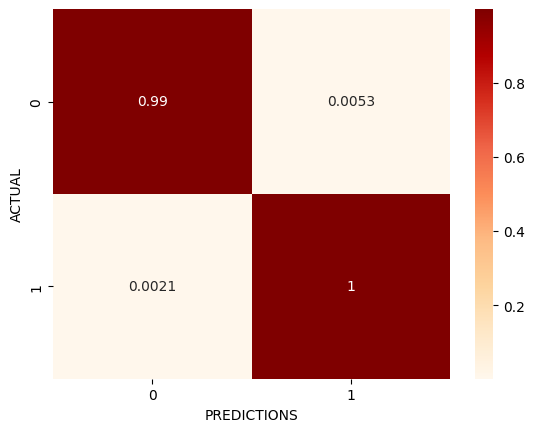

In [57]:

cf = confusion_matrix(y_test, binary_pred, normalize = 'true')
sns.heatmap(cf, annot = True, cmap = 'OrRd');
plt.xlabel('PREDICTIONS');
plt.ylabel('ACTUAL');

In [63]:
model.save("model.keras")  # You already have fraud_detection_model.h5
import joblib

joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']